In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Extraction

In [2]:
df = pd.read_csv('Premier_League.csv')

In [3]:
df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [4]:
df.shape

(380, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   Home Team         380 non-null    object 
 5   Goals Home        380 non-null    int64  
 6   Away Team         380 non-null    object 
 7   Away Goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

# Exploratory Data Analysis

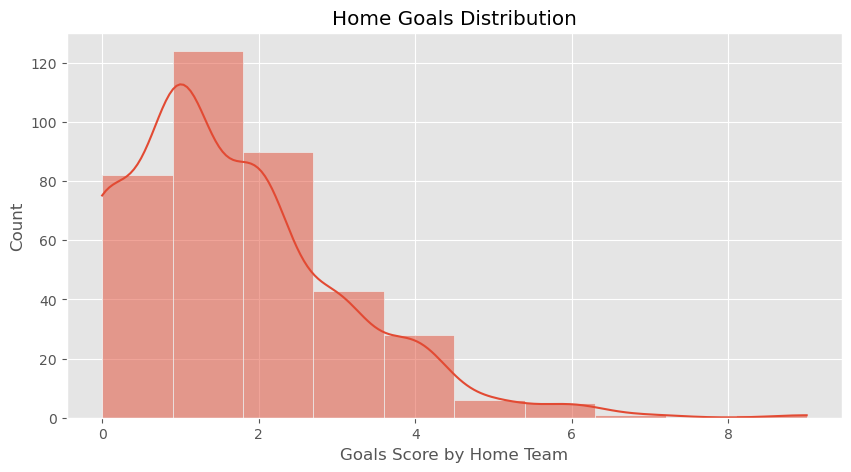

In [6]:
# Home Goal Distribution
plt.figure(figsize = (10, 5))
sns.histplot(df['Goals Home'], bins = 10, kde = True)
plt.title('Home Goals Distribution')
plt.xlabel('Goals Score by Home Team')
plt.ylabel('Count')
plt.grid(True)
plt.show()

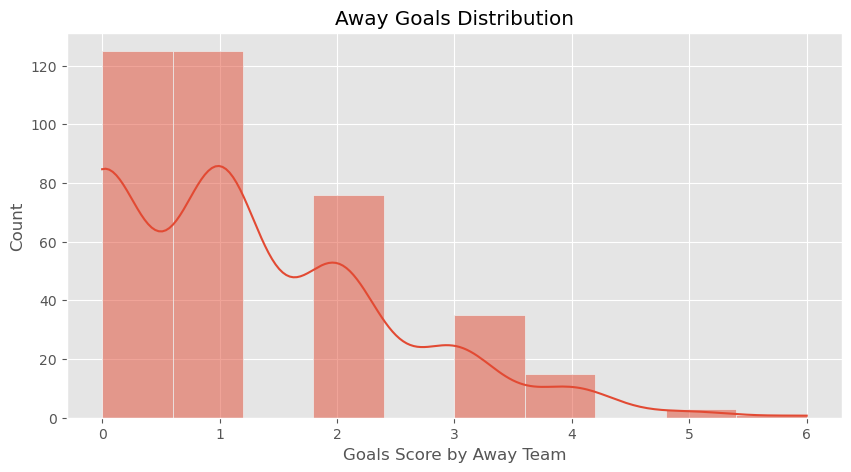

In [7]:
# Away Goals Distribution
plt.figure(figsize = (10, 5))
sns.histplot(df['Away Goals'], bins = 10, kde = True)
plt.title('Away Goals Distribution')
plt.xlabel('Goals Score by Away Team')
plt.ylabel('Count')
plt.grid(True)
plt.show()

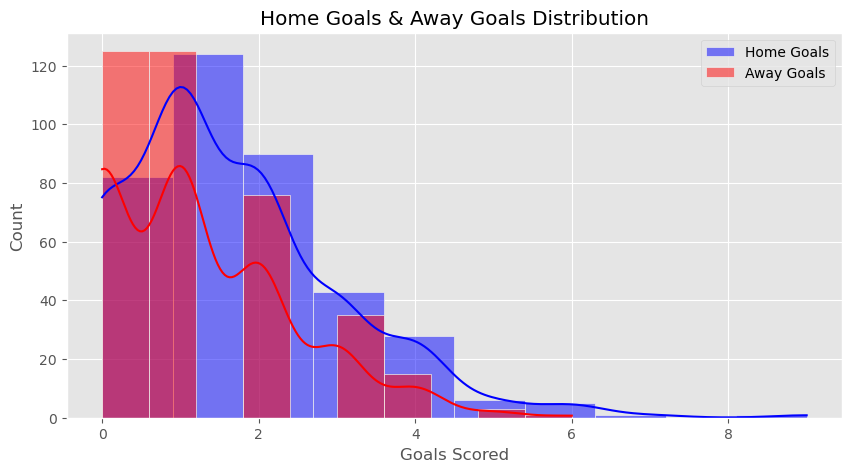

In [8]:
# Distribution of Home and Away Goals
plt.figure(figsize = (10, 5))
sns.histplot(df['Goals Home'], bins = 10, kde = True, color = 'blue', label = 'Home Goals')
sns.histplot(df['Away Goals'], bins = 10, kde = True, color = 'red', label = 'Away Goals')
plt.title('Home Goals & Away Goals Distribution')
plt.xlabel('Goals Scored')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Histogram shows that home team makes the most goal throughout the year

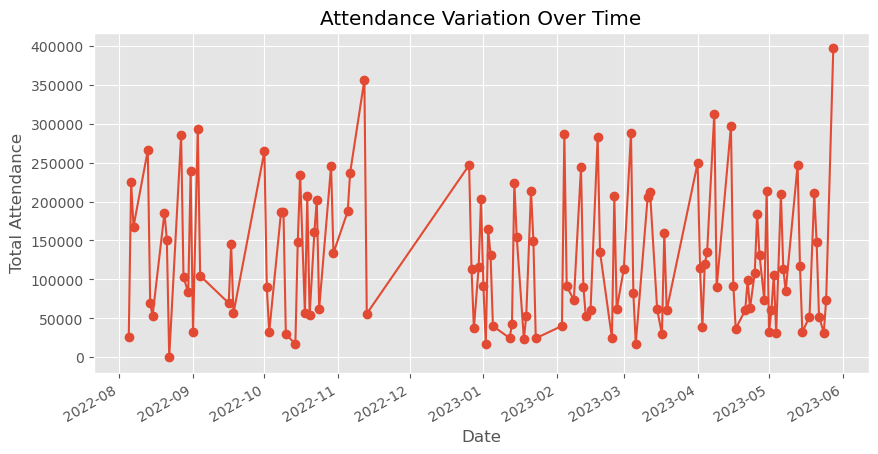

In [9]:
# Attendance Variation over time
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['attendance'] = df['attendance'].astype(str).str.replace(',', '').str.replace('Nan', '0').astype(int) # Take out the , from the attendance and convert to integer
attendance_overtime = df.groupby('date')['attendance'].sum()

plt.figure(figsize = (10, 5))
attendance_overtime.plot(kind = 'line', marker = 'o')
plt.title('Attendance Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Total Attendance')
plt.grid(True)
plt.show()

Attendance peaked between 2022-11 & 2022-12. The highest peaked at the end of 2023-06

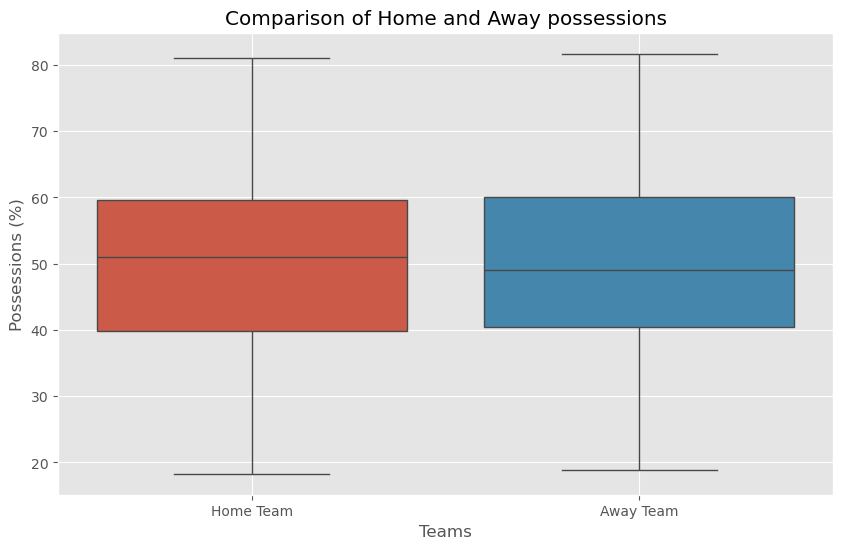

In [10]:
# Comparison of Home and Away possessions
plt.figure(figsize = (10, 6))
sns.boxplot(df[['home_possessions', 'away_possessions']])
plt.title('Comparison of Home and Away possessions')
plt.xlabel('Teams')
plt.ylabel('Possessions (%)')
plt.xticks(ticks = [0, 1], labels = ['Home Team', 'Away Team'])
plt.grid(True)
plt.show()

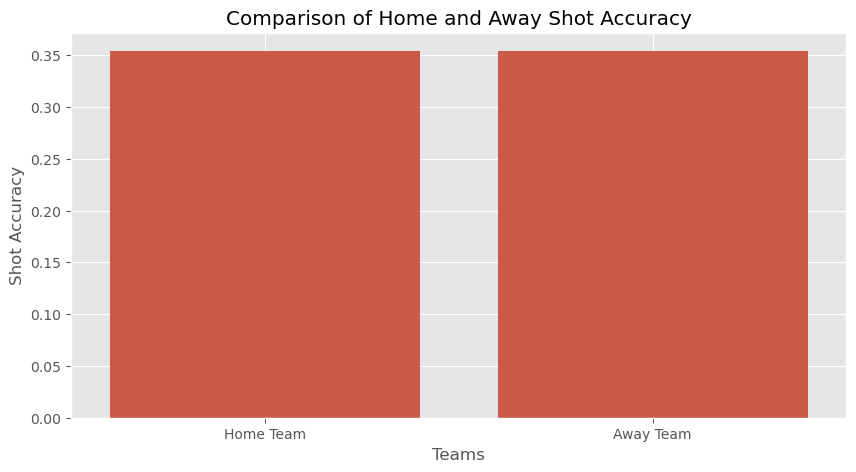

In [11]:
# Comparing Home and Away Shot Accuracy
df['home_shot_accuracy'] = df['home_on'] / df['home_shots']
df['away_shot_accuracy'] = df['away_on'] / df['away_shots']

plt.figure(figsize = (10, 5))
sns.barplot(x = ['Home Team', 'Away Team'], y = [df['home_shot_accuracy'].mean(), df['away_shot_accuracy'].mean()])
plt.title('Comparison of Home and Away Shot Accuracy')
plt.xlabel('Teams')
plt.ylabel('Shot Accuracy')
plt.grid(True)
plt.show()

# Feature Engineering

In [12]:
# Drop irrelevant columns
df = df.drop(columns=['clock', 'stadium', 'attendance', 'links'])

In [13]:
# Convert date to numerical feature
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear

In [14]:
# Calculate goal difference and home team win percentage
df['goal_difference'] = df['Goals Home'] - df['Away Goals']
df['home_team_win'] = df['goal_difference'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
# Encode Team Names to categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Home Team'] = label_encoder.fit_transform(df['Home Team'])
df['Away Team'] = label_encoder.fit_transform(df['Away Team'])

In [16]:
df.head()

,date,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,...,away_fouls,home_yellow,away_yellow,home_red,away_red,home_shot_accuracy,away_shot_accuracy,day_of_year,goal_difference,home_team_win
0,2023-05-28,0,5,19,0,51.0,49.0,14,6,8,...,11,0,0,0,0,0.571429,0.000000,148,5,1
1,2023-05-28,1,2,4,1,40.3,59.7,12,8,5,...,16,4,4,0,0,0.416667,0.500000,148,1,1
2,2023-05-28,3,1,12,0,34.4,65.6,11,17,4,...,8,4,0,0,0,0.363636,0.176471,148,1,1
3,2023-05-28,5,1,14,1,64.4,35.6,22,13,5,...,11,0,0,0,0,0.227273,0.307692,148,0,0
4,2023-05-28,6,1,15,1,66.0,34.0,15,7,3,...,13,0,2,0,0,0.200000,0.571429,148,0,0


### Rolling Average for possessions (last 5 seasons)

In [26]:
# Home Team data
home = df[['date', 'Home Team', 'home_possessions']].copy()
home.columns = ['date', 'Team', 'Possessions']

# Away Team data
away = df[['date', 'Away Team', 'away_possessions']].copy()
away.columns = ['date', 'Team', 'Possessions']

team_df = pd.concat([home, away])

In [27]:
team_df = team_df.sort_values(by = 'date')

In [28]:
# 1. Reset the index to make it unique
team_df = team_df.reset_index(drop=True)

# 2. Run your original code
team_df["rolling_avg_possessions"] = (
    team_df.groupby("Team")["Possessions"]
    .rolling(window=5)
    .mean()
    .reset_index(level=0, drop=True)
)

In [30]:
team_df

,date,Team,Possessions,rolling_avg_possessions
0,2022-08-30,9,69.1,NaN
1,2022-08-30,4,60.9,NaN
2,2022-08-30,3,51.1,NaN
3,2022-08-30,5,67.8,NaN
4,2022-08-30,16,32.2,NaN
...,...,...,...,...
675,2023-05-28,7,37.8,37.68
676,2023-05-28,9,52.1,41.28
677,2023-05-28,16,30.9,40.84
678,2023-05-28,11,69.1,62.66


Empty rolling averages present. Remove them.

Merge RA to original dataset

In [32]:
df = df.merge(team_df[['date', 'Team', 'rolling_avg_possessions']], left_on=['date', 'Home Team'], right_on=['date', 'Team'], how='left').rename(columns={'rolling_avg_possessions': 'home_rolling_avg_possessions'}).drop(columns=['Team'])

In [33]:
df = df.merge(team_df[['date', 'Team', 'rolling_avg_possessions']], left_on=['date', 'Away Team'], right_on=['date', 'Team'], how='left').rename(columns={'rolling_avg_possessions': 'away_rolling_avg_possessions'}).drop(columns=['Team'])

In [34]:
df

,date,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,...,away_red,home_shot_accuracy,away_shot_accuracy,day_of_year,goal_difference,home_team_win,home_rolling_avg_goals,away_rolling_avg_goals,home_rolling_avg_possessions,away_rolling_avg_possessions
0,2023-05-28,0,5,19,0,51.0,49.0,14,6,8,...,0,0.571429,0.000000,148,5,1,2.0,0.4,54.82,47.00
1,2023-05-28,1,2,4,1,40.3,59.7,12,8,5,...,0,0.416667,0.500000,148,1,1,1.0,1.8,45.52,57.54
2,2023-05-28,3,1,12,0,34.4,65.6,11,17,4,...,0,0.363636,0.176471,148,1,1,1.6,1.4,48.14,66.94
3,2023-05-28,5,1,14,1,64.4,35.6,22,13,5,...,0,0.227273,0.307692,148,0,0,1.4,1.4,60.16,53.02
4,2023-05-28,6,1,15,1,66.0,34.0,15,7,3,...,0,0.200000,0.571429,148,0,0,1.8,1.8,55.74,28.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2022-08-31,11,2,14,1,71.8,28.2,23,5,6,...,0,0.260870,0.400000,243,1,1,3.0,1.4,NaN,NaN
336,2022-08-30,6,1,3,1,48.9,51.1,13,9,4,...,0,0.307692,0.333333,242,0,0,1.4,2.0,NaN,NaN
337,2022-08-30,8,2,4,1,39.1,60.9,10,7,3,...,0,0.300000,0.571429,242,1,1,1.6,1.2,NaN,NaN
338,2022-08-30,16,2,5,1,32.2,67.8,9,10,7,...,0,0.777778,0.400000,242,1,1,1.4,1.2,NaN,NaN


In [37]:
df.isnull().sum()

date                            0
Home Team                       0
Goals Home                      0
Away Team                       0
Away Goals                      0
home_possessions                0
away_possessions                0
home_shots                      0
away_shots                      0
home_on                         0
away_on                         0
home_off                        0
away_off                        0
home_blocked                    0
away_blocked                    0
home_pass                       0
away_pass                       0
home_chances                    0
away_chances                    0
home_corners                    0
away_corners                    0
home_offside                    0
away_offside                    0
home_tackles                    0
away_tackles                    0
home_duels                      0
away_duels                      0
home_saves                      0
away_saves                      0
home_fouls    

In [36]:
df.dropna(inplace = True)

### Rolling Average for goals (last 5 seasons)

In [17]:
# Home Team data
home = df[['date', 'Home Team', 'Goals Home']].copy()
home.columns = ['date', 'Team', 'Goals']

# Away Team data
away = df[['date', 'Away Team', 'Away Goals']].copy()
away.columns = ['date', 'Team', 'Goals']

team_df = pd.concat([home, away])

In [18]:
team_df = team_df.sort_values(by = 'date')

In [19]:
# 1. Reset the index to make it unique
team_df = team_df.reset_index(drop=True)

# 2. Run your original code
team_df["rolling_avg_goals"] = (
    team_df.groupby("Team")["Goals"]
    .rolling(window=5)
    .mean()
    .reset_index(level=0, drop=True)
)

In [20]:
team_df

,date,Team,Goals,rolling_avg_goals
0,2022-08-05,6,0,NaN
1,2022-08-05,0,2,NaN
2,2022-08-06,5,1,NaN
3,2022-08-06,16,1,NaN
4,2022-08-06,15,0,NaN
...,...,...,...,...
755,2023-05-28,2,0,1.0
756,2023-05-28,17,4,2.0
757,2023-05-28,18,1,1.0
758,2023-05-28,11,4,2.0


Empty rolling averages present. Remove them.

Merge RA to original dataset

In [21]:
df = df.merge(team_df[['date', 'Team', 'rolling_avg_goals']], left_on=['date', 'Home Team'], right_on=['date', 'Team'], how='left').rename(columns={'rolling_avg_goals': 'home_rolling_avg_goals'}).drop(columns=['Team'])

In [22]:
df = df.merge(team_df[['date', 'Team', 'rolling_avg_goals']], left_on=['date', 'Away Team'], right_on=['date', 'Team'], how='left').rename(columns={'rolling_avg_goals': 'away_rolling_avg_goals'}).drop(columns=['Team'])

In [23]:
df

,date,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,...,away_yellow,home_red,away_red,home_shot_accuracy,away_shot_accuracy,day_of_year,goal_difference,home_team_win,home_rolling_avg_goals,away_rolling_avg_goals
0,2023-05-28,0,5,19,0,51.0,49.0,14,6,8,...,0,0,0,0.571429,0.000000,148,5,1,2.0,0.4
1,2023-05-28,1,2,4,1,40.3,59.7,12,8,5,...,4,0,0,0.416667,0.500000,148,1,1,1.0,1.8
2,2023-05-28,3,1,12,0,34.4,65.6,11,17,4,...,0,0,0,0.363636,0.176471,148,1,1,1.6,1.4
3,2023-05-28,5,1,14,1,64.4,35.6,22,13,5,...,0,0,0,0.227273,0.307692,148,0,0,1.4,1.4
4,2023-05-28,6,1,15,1,66.0,34.0,15,7,3,...,2,0,0,0.200000,0.571429,148,0,0,1.8,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2022-08-06,9,2,19,1,40.1,59.9,12,15,4,...,0,0,0,0.333333,0.400000,218,1,1,NaN,NaN
376,2022-08-06,14,2,15,0,61.4,38.6,23,5,10,...,3,0,0,0.434783,0.000000,218,2,1,NaN,NaN
377,2022-08-06,17,4,16,1,57.5,42.5,18,10,8,...,0,0,0,0.444444,0.200000,218,3,1,NaN,NaN
378,2022-08-06,7,0,5,1,37.3,62.7,8,15,4,...,2,0,0,0.500000,0.400000,218,-1,0,NaN,NaN


In [24]:
df.isnull().sum()

date                       0
Home Team                  0
Goals Home                 0
Away Team                  0
Away Goals                 0
home_possessions           0
away_possessions           0
home_shots                 0
away_shots                 0
home_on                    0
away_on                    0
home_off                   0
away_off                   0
home_blocked               0
away_blocked               0
home_pass                  0
away_pass                  0
home_chances               0
away_chances               0
home_corners               0
away_corners               0
home_offside               0
away_offside               0
home_tackles               0
away_tackles               0
home_duels                 0
away_duels                 0
home_saves                 0
away_saves                 0
home_fouls                 0
away_fouls                 0
home_yellow                0
away_yellow                0
home_red                   0
away_red      

In [25]:
df.dropna(inplace = True)

# Random Forest Regression

In [38]:
df

,date,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,...,away_red,home_shot_accuracy,away_shot_accuracy,day_of_year,goal_difference,home_team_win,home_rolling_avg_goals,away_rolling_avg_goals,home_rolling_avg_possessions,away_rolling_avg_possessions
0,2023-05-28,0,5,19,0,51.0,49.0,14,6,8,...,0,0.571429,0.000000,148,5,1,2.0,0.4,54.82,47.00
1,2023-05-28,1,2,4,1,40.3,59.7,12,8,5,...,0,0.416667,0.500000,148,1,1,1.0,1.8,45.52,57.54
2,2023-05-28,3,1,12,0,34.4,65.6,11,17,4,...,0,0.363636,0.176471,148,1,1,1.6,1.4,48.14,66.94
3,2023-05-28,5,1,14,1,64.4,35.6,22,13,5,...,0,0.227273,0.307692,148,0,0,1.4,1.4,60.16,53.02
4,2023-05-28,6,1,15,1,66.0,34.0,15,7,3,...,0,0.200000,0.571429,148,0,0,1.8,1.8,55.74,28.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2022-10-10,15,1,1,1,39.9,60.1,6,12,3,...,0,0.500000,0.166667,283,0,0,1.0,0.8,41.38,47.56
295,2022-10-09,18,3,8,1,50.3,49.7,17,8,8,...,0,0.470588,0.250000,282,2,1,1.4,1.6,41.20,45.56
298,2022-10-08,2,2,10,1,44.2,55.8,10,9,4,...,0,0.400000,0.555556,281,1,1,1.2,1.8,39.04,52.82
300,2022-10-08,12,4,16,0,65.2,34.8,21,5,8,...,0,0.380952,0.000000,281,4,1,4.0,0.6,65.10,43.54


In [47]:
# 1. Manually select only 'Pre-Match' features
predictors = ['Home Team', 'Away Team', 'home_shot_accuracy', 'away_shot_accuracy', 'home_rolling_avg_goals', 'away_rolling_avg_goals', 'home_rolling_avg_possessions', 'away_rolling_avg_possessions'] # Data before whistle blows / before match ends
X = df[predictors]
y = df['home_team_win']

# 2. Chronological Split (No random shuffling)
# Assuming your df is sorted by date
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 3. Train and Score
clf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=0)
clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
y_preds = clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)

print(f"Accuracy: {acc:.2%}")
print(f"Precision: {prec:.2%}")

Accuracy: 70.00%
Precision: 78.26%


In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.76      0.61      0.68        31

    accuracy                           0.70        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.70      0.70        60



## Hyperparameter Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rs = RandomizedSearchCV(clf, param_grid, n_iter = 20, scoring='neg_mean_squared_error', cv = 3)
rs.fit(X_train, y_train)

,estimator,RandomForestC...andom_state=0)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [46]:
print(rs.best_estimator_)
print(rs.best_params_)

RandomForestClassifier(n_estimators=200, random_state=0)
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


In [42]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rs = RandomizedSearchCV(clf, param_grid, n_iter = 20, scoring='neg_mean_squared_error', cv = 3)
rs.fit(X_train, y_train)

,estimator,RandomForestC...andom_state=0)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
print(rs.best_estimator_)
print(rs.best_params_)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=0)
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


# XGBoost

In [48]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

xgbclf = XGBClassifier(subsample=0.8, n_estimators=100, max_depth=6, learning_rate=0.2, colsample_bytree=0.6)
xgbclf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [56]:
y_preds = xgbclf.predict(X_test)

acc = accuracy_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)

print(f"Accuracy: {acc:.2%}")
print(f"Precision: {prec:.2%}")

Accuracy: 58.33%
Precision: 62.50%


In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        29
           1       0.62      0.48      0.55        31

    accuracy                           0.58        60
   macro avg       0.59      0.59      0.58        60
weighted avg       0.59      0.58      0.58        60



## Hyperparamter Tuning

In [53]:
param_grid_xgb = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 500, 1000]
}

rs = RandomizedSearchCV(xgbclf, param_grid_xgb, n_iter = 20, scoring='neg_mean_squared_error', cv = 5)
rs.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 500, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [54]:
print(rs.best_estimator_)
print(rs.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
